<a href="https://colab.research.google.com/github/HJKQWE/Project_CV_2_pretrained_CNN/blob/main/Project_CV_2_%D0%93%D1%83%D1%80%D0%BE%D0%B2%D0%B0_%D0%AE%D0%BB%D0%B8%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning

В зависимости от количества и природы данных есть выбор из **нескольких стратегий Transfer Learning**, а именно:

* **мало данных** ($\le$ 10k) и они **похожи** на данные, на которых была обучена сеть до этого:  
  - Если данные совсем похожи, можно попробовать использовать готовую модель. Если качество не устраивает, то тогда стоит использовать CNN для извлечения признаков и обучить свой классификатор на этих данных. Так как данные похожи на те, на которых обучалась сеть, то высокоуровневые признаки, полученные с помощью последних слоёв сети, должны оказаться информативными. Если делать в этом случае Fine-Tuning, то сеть может переобучиться, поскольку данных мало.
* **мало данных** ($\le$ 10k) и они **не похожи** на данные, на которых была обучена сеть до этого:  
  - Здесь мы не можем ожидать от сети, что выходы последних слоёв будут информативными для новых данных. Следует также действовать как и в пункте выше, но брать как признаки выходы более ранних слоёв, ведь, как мы помним, они (как ожидается) соответствуют более общим паттернам в данных.
* **много данных** ($\ge$ 10k) и они **похожи** на данные, на которых была обучена сеть до этого: 
  - В этом случае можем смело делать Fine-Tuning (если не устроило качество модели "из коробки"), ведь данных много, и вероятность переобучения меньше. В данном случае имеет смысл разморозить веса последних нескольких слоёв.
* **много данных** ($\ge$ 10k) и они **не похожи** на данные, на которых была обучена сеть до этого:
  - В этом случае можно полностью менять все параметры (и гиперпараметры) нейросети, ведь по сути мы пользуемся только её архитектурой, забывая о том, что она уже была когда-то обучена. Но часто веса предобученной сети оставляют в качестве инициализации для обучения на новых данных.

Давайте соберем теперь все наши знания воедино в один удобный работающий pipeline. Теперь вы можете дать максимальный простор творчеству и проводить сколь угодно много экспериментов. 

Первым делом установим необходимые библиотеки. Среда Google Colab имеет особенность в плане совместимостей версий, поэтому порой бывает необходимо установить определенную версию того или иного пакета.

In [ ]:
!pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 11.6 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.6.0.66
Uninstalling opencv-python-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/cv2/*
    /usr/local/lib/python3.9/dist-packages/opencv_python-4.6.0.66.dist-info/*
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.9/d

In [ ]:
!pip uninstall opencv-contrib-python

Found existing installation: opencv-contrib-python 4.6.0.66
Uninstalling opencv-contrib-python-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python-4.6.0.66.dist-info/*
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libavcodec-5896f664.so.58

In [ ]:
!pip install opencv-contrib-python==4.5.5.62

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 12.9 MB/s eta 0:00:00


In [ ]:
!pip install -q --upgrade wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.2 MB/s eta 0:00:00


In [ ]:
import os
import wandb
import shutil 
from pathlib import Path

import numpy as np 
import random


from tqdm import tqdm
import copy
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau, StepLR

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

import timm

import albumentations as A
import albumentations.pytorch as AP
from albumentations.pytorch import ToTensorV2

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90, Resize, RandomCrop,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, Rotate, RandomScale, RandomGridShuffle,
    RandomContrast, RandomGamma, RandomBrightness, CenterCrop, VerticalFlip, ColorJitter,
    ChannelShuffle, InvertImg, RGBShift, ElasticTransform, Equalize, RandomResizedCrop, ChannelDropout
)

import matplotlib.pyplot as plt
%matplotlib inline

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# ====================================================
# CFG - класс с параметрами нашего эксперимента
# ====================================================

class CFG:

    num_workers=2
    model_name ='resnet' # ['resnext', 'inception', 'densenet', 'efficientnet']
    size=224
    scheduler='StepLR' # ['StepLR', 'ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']
    epochs=10
    step_size = 20 # StepLR
    gamma = 0.1 # StepLR
    #factor=0.2 # ReduceLROnPlateau
    #patience=4 # ReduceLROnPlateau
    #eps=1e-6 # ReduceLROnPlateau
    #T_max=6 # CosineAnnealingLR
    #T_0=6 # CosineAnnealingWarmRestarts
    lr=1e-4 # 3e-4
    min_lr=1e-6
    batch_size=8
    seed=42

    api = "c46873158d9b17d359eb43bbe31308d56f8ce3d4"# вписать свой API Wandb  
    project = "ready_go"# вписать название эксперимента, который предварительно надо создать в Wandb
    entity = "gret-ell"# ввести свой логин
    wandb = True # флаг использования Wandb

In [ ]:
# Переведем наш класс с параметрами в словарь

def class2dict(f):
  return dict((name, getattr(f, name)) for name in dir(f) if not name.startswith('__'))

In [ ]:
# Зафиксируем seed для воспроизводимости
# “Начальное число” является отправной точкой для последовательности, 
# и гарантия заключается в том, что если начать с того же начального числа, 
# вы получите ту же последовательность чисел. Тщательно задавая случайное 
# начальное число в вашем проекте, можно добиться воспроизводимости.
# Для этого нужно:
# 1. Установить начальное значение random.seed,
# 2. Установить переменную среды PYTHONHASHSEED с фиксированным значением,
# 3. Установить псевдослучайный генератор numpy с фиксированным значением np.random.seed,
# 4. Фиксировать генератор случайных чисел pytorch - torch.manual_seed,
# 5. Фиксировать генератор случайных чисел для GPU - torch.cuda.manual_seed.

def seed_everything(seed):
    random.seed(CFG.seed) # фиксируем генератор случайных чисел
    os.environ['PYTHONHASHSEED'] = str(CFG.seed) # фиксируем заполнения хешей. PYTHONHASHSEED переменная среды с фиксированным значением
    np.random.seed(CFG.seed) # фиксируем генератор случайных чисел numpy
    torch.manual_seed(CFG.seed) # фиксируем генератор случайных чисел pytorch
    torch.cuda.manual_seed(CFG.seed) # фиксируем генератор случайных чисел для GPU

# **Задача. Классификация imageNet10**. 
Цель: Добиться 98% точности на тестовом наборе датасета imageNet10.

In [ ]:
# Загружаем датасет
dataset_path = 'imagenette2-160/'
if not os.path.exists(dataset_path):
    !wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
    !tar zxvf imagenette2-160.tgz

Выходные данные были обрезаны до нескольких последних строк (5000).
imagenette2-160/train/n03888257/n03888257_16077.JPEG
imagenette2-160/train/n03888257/n03888257_23339.JPEG
imagenette2-160/train/n03888257/n03888257_44204.JPEG
imagenette2-160/train/n03888257/n03888257_61633.JPEG
imagenette2-160/train/n03888257/n03888257_15067.JPEG
imagenette2-160/train/n03888257/n03888257_75365.JPEG
imagenette2-160/train/n03888257/n03888257_63966.JPEG
imagenette2-160/train/n03888257/n03888257_3927.JPEG
imagenette2-160/train/n03888257/n03888257_20684.JPEG
imagenette2-160/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2-160/train/n03888257/n03888257_14016.JPEG
imagenette2-160/train/n03888257/n03888257_37776.JPEG
imagenette2-160/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2-160/train/n03888257/n03888257_17513.JPEG
imagenette2-160/train/n03888257/n03888257_17143.JPEG
imagenette2-160/train/n03888257/n03888257_6738.JPEG
imagenette2-160/train/n03888257/n03888257_4355.JPEG
imagenette2-160/tr

Данный датасет представляет собой набор картинок 10 классов из датасета ImageNet, подробнее [тут](https://github.com/fastai/imagenette).

Для успешного решения данной задачи нам потребуется 2 новые библиотеки: **Albumentations** и **PyTorch image models (timm)**.

## Библиотеки Albumentations и timm



| **Название** | **Назначение** | **Ссылка** | 
| ----- | ----- | ----- |
| **`timm`** | Все новейшие и лучшие модели компьютерного зрения на PyTorch, собранные в одном месте. | https://github.com/rwightman/pytorch-image-models|
| **`Albumentations`** | Самая обширная коллекция всевозможных аугментаций для компьютерного зрения, быстрая и удобная в использовании. | https://albumentations.ai/ | 

## Подзадача №1. 
Изучить внимательно виды аугментаций, представленных в библиотеке `Albumentations` и написать функцию с ними.

Библиотека `Albumentations` предлагает широкой функционал, при этом имея компакный вид. На [сайте](https://albumentations.ai/docs/examples/migrating_from_torchvision_to_albumentations/) библиотеки указаны соответствия из TorchVision с возможностями Albumentations.

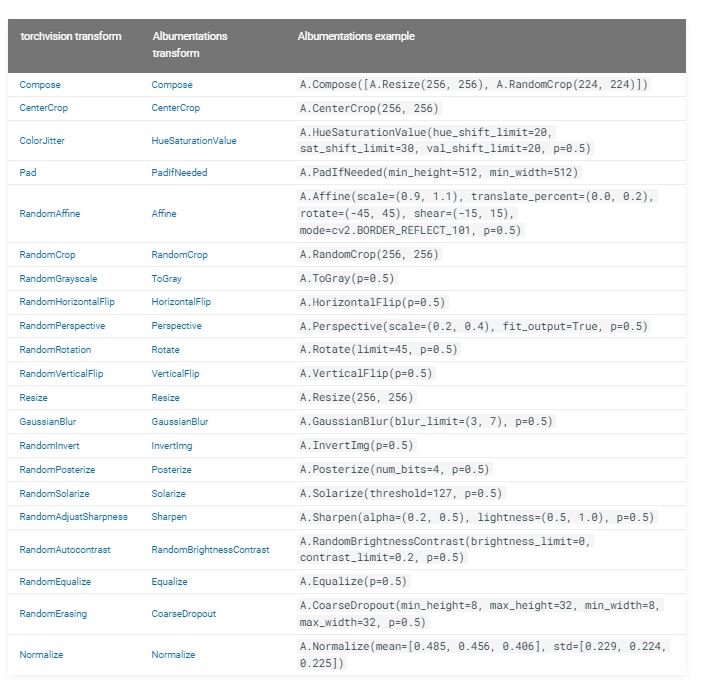

Применим несколько трансформаций, а именно:

Resize - изменяет размер входных данных до заданной высоты и ширины.

RandomCrop - обрезает случайную часть входных данных.

HorizontalFlip - поворот изображения по горизонтали вокруг оси y.

Rotate - поворот входных данных на угол, выбранный случайным образом из равномерного распределения.

  * р - вероятность применения преобразования. По умолчанию: 0.5.
  * limit - диапазон, из которого выбирается случайный угол. Если limit - это один int, угол выбирается из (-limit, limit). По умолчанию: (-90, 90).
  * interpolation - флаг, который используется для указания алгоритма интерполяции. Должно быть одно из: cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4. По умолчанию: cv2.INTER_LINEAR.
  * border_mode - флаг, который используется для указания метода экстраполяции пикселей. Должно быть одно из: cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101. По умолчанию: cv2.BORDER_REFLECT_101



На валидационных данных не рекомендуется делать никаких преобразований, кроме изменения размера и, возможно, еще обрезки изображений. Ведь, на них будем проверять предсказание модели, а для этого нужны изображения естественные и близкие к таковым.


In [ ]:
# поканальные значения среднего и стандартного отклонения для ImageNet
IMAGENET_MEAN = np.array([0.485, 0.456, 0.406])
IMAGENET_STD = np.array([0.229, 0.224, 0.225])

In [ ]:
# Функция с аугментациями

def get_transforms(*, data):
    
    if data == 'train':
       transform = A.Compose([
          A.Resize(256,256),
          A.RandomCrop(256, 256),
          A.HorizontalFlip(p=0.5),
          A.Rotate(p=0.3, limit=(-10, 10), interpolation=3, border_mode=2),
          A.Normalize(
                  mean= IMAGENET_MEAN,
                  std= IMAGENET_STD,
          ),
          ToTensorV2()
        ])


    elif data == 'valid': 
       transform = A.Compose([
          A.Resize(256,256),
          A.Normalize(
                  mean= IMAGENET_MEAN,
                  std= IMAGENET_STD,
          ),
          ToTensorV2()
        ])
       
    return transform

Поскольку у нас нестандартные аугментации, нам придется несколько переписать стандартный модуль Dataset.

In [ ]:
# ====================================================
# MakeDataset - класс для создания датасета
# ====================================================

class MakeDataset(torch.utils.data.Dataset):
    def __init__(self, files, transform=get_transforms):
        super().__init__()
        self.files = files           
        self.labels = [path.parent.name for path in self.files]
        self.len_ = len(self.files)
        self.transform = transform
        self.classes = ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 
                        'n03417042', 'n03425413', 'n03445777', 'n03888257']
        
    def __len__(self): # функция определения размера датасета
        return self.len_

    def __getitem__(self, index): # функция чтения и обработки каждой картинки
        image = cv2.imread(f'{self.files[index]}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        label = self.labels[index]
        for i in range(len(self.classes)):
          if label == self.classes[i]:
            y = i        

        return image, y


На [странице библиотеки](https://albumentations.ai/docs/examples/pytorch_classification/) в качестве примера приведен следующий код для интеграции аугментации: 



```
 class AlbumentationsDataset(Dataset):
     """__init__ and __len__ functions are the same as in TorchvisionDataset"""
     def __init__(self, file_paths, labels, transform=None):
         self.file_paths = file_paths
         self.labels = labels
         self.transform = transform
        
     def __len__(self):
         return len(self.file_paths)

     def __getitem__(self, idx):
         label = self.labels[idx]
         file_path = self.file_paths[idx]
        
         # Read an image with OpenCV
         image = cv2.imread(file_path)
        
         # By default OpenCV uses BGR color space for color images,
         # so we need to convert the image to RGB color space.
         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
         if self.transform:
             augmented = self.transform(image=image)
             image = augmented['image']
         return image, label


 albumentations_transform = A.Compose([
     A.Resize(256, 256), 
     A.RandomCrop(224, 224),
     A.HorizontalFlip(),
     A.Normalize(
         mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225],
     ),
     ToTensorV2()
 ])


 albumentations_dataset = AlbumentationsDataset(
     file_paths=['./images/image_1.jpg', './images/image_2.jpg', './images/image_3.jpg'],
     labels=[1, 2, 3],
     transform=albumentations_transform,
)
```



In [ ]:
TRAIN_DIR = Path('/content/imagenette2-160/train')
VAL_DIR = Path('/content/imagenette2-160/val')

# рекурсивно обойдем все папки с изображениями
train_files = sorted(list(TRAIN_DIR.rglob('*.JPEG')))
val_files = sorted(list(VAL_DIR.rglob('*.JPEG')))

In [ ]:
train_dataset = MakeDataset(train_files, transform=get_transforms(data='train'))
val_dataset = MakeDataset(val_files, transform=get_transforms(data='valid'))

In [ ]:
# ====================================================
# imshow - Функция отрисовки изображений
# ====================================================

def imshow(inp, title=None, plt_ax=plt, default=False):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

Посмотрим, как выглядят наши картинки уже после применения к ним аугментаций.

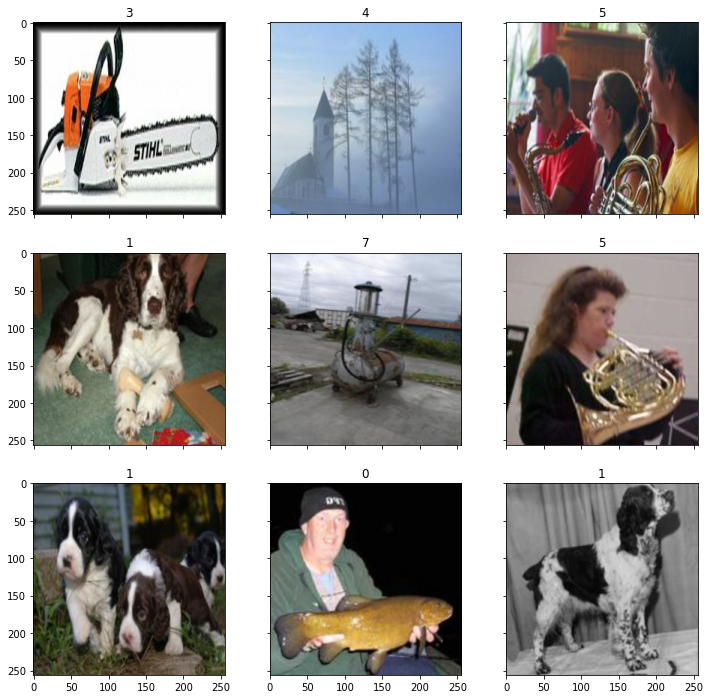

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_img = int(np.random.uniform(0,len(train_files)))
    im_val, label = train_dataset[random_img]
    img_label = label
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=CFG.batch_size, shuffle=True, num_workers=CFG.num_workers)
valid_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=CFG.batch_size, shuffle=False, num_workers=CFG.num_workers)

print('Train and Valid datasets are loaded:\n')
print('{:<7s}{:>10s}{:>10s}'.format('Dataset', 'Batches', 'Pictures')), print('-' * 28)
print('{:<7s}{:>10d}{:>10d}'.format('Train', len(train_loader), len(train_dataset)))
print('{:<7s}{:>10d}{:>10d}'.format('Valid', len(valid_loader), len(val_dataset)))

Train and Valid datasets are loaded:

Dataset   Batches  Pictures
----------------------------
Train        1184      9469
Valid         491      3925


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# ====================================================
# train_val_model - Функция обучения и инференса модели
# ====================================================


def train_val_model(model, loss, optimizer, scheduler, num_epochs):

    loss_hist = {'train':[], 'val':[]}
    acc_hist = {'train':[], 'val':[]}
    
    best_acc = 0.

    if CFG.wandb:
        os.environ["WANDB_API_KEY"] = CFG.api
        wandb.init(project=CFG.project, name=CFG.model_name, entity=CFG.entity, reinit=True, config=class2dict(CFG))

    seed_everything(CFG.seed)

    for epoch in range(num_epochs):
        print("Epoch {}/{}:".format(epoch+1, num_epochs), end="\n")
        for phase in ['train', 'val']:
            if phase == 'train': # Если фаза == train +++++
                dataloader = train_loader # Берем train_dataset
                scheduler.step() # Делаем 1 шаг (произошла одна эпоха)
                model.train() # Модель в training mode - обучение (Фиксируем модель, иначе у нас могут изменяться параметры слоя батч-нормализации и изменится нейронка с течением времени)

            else: # Если фаза == val
                dataloader = valid_loader # Берем valid_dataset 
                model.eval()   # Модель в evaluate mode - валидация (Фиксируем модель, иначе у нас могут изменяться параметры слоя батч-нормализации и изменится нейронка с течением времени)
 
            running_loss = 0. 
            running_acc = 0.
 
            # Итерируемся по dataloader ++++
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device) # Тензор с изображениями переводим на GPU 
                labels = labels.to(device) # Тензор с лейблами переводим на GPU 
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'): # Если фаза train, то активируем все градиенты (те, которые не заморожены)
                    preds = model(inputs) # Считаем предикты, input передаем в модель
                    loss_value = loss(preds, labels) # Посчитали  Loss    
                    preds_class = preds.argmax(dim=1) # Получаем класс, берем .argmax(dim=1) нейрон с максимальной активацией
                
                    if phase == 'train': # Считаем градиент ++
                         loss_value.backward()
                         optimizer.step() # Считаем шаг градиентного спуска
                        
 
                # Статистика
                running_loss += loss_value.item() # Считаем Loss
                running_acc += (preds_class == labels.data).float().mean().data.cpu().numpy()  # Считаем accuracy
 
            epoch_loss = running_loss / len(dataloader)  # Loss'ы делим на кол-во бачей в эпохе 
            epoch_acc = running_acc / len(dataloader) # Считаем Loss на кол-во бачей в эпохе
            
            if CFG.wandb and phase == 'train':
              wandb.log({'train_loss': epoch_loss,
                   'train_accuracy': epoch_acc})

            if CFG.wandb and phase == 'val':
              wandb.log({'test_loss': epoch_loss,
                   'test_accuracy': epoch_acc})
               
            print("{} loss: {:.2f} accuracy: {:.2f}".format(phase, epoch_loss, epoch_acc), end="\n")

            if phase == 'val' and epoch_acc > best_acc:
              best_acc = epoch_acc
              print(f'Epoch {epoch+1} - Save Best Accuracy: {best_acc:.2f} Model\n')
              torch.save(model.state_dict(), '/content/'+f'{CFG.model_name}_best.pth')
            
            loss_hist[phase].append(epoch_loss)
            acc_hist[phase].append(epoch_acc)
        
    return model, loss_hist, acc_hist

## Подзадача №2. 
Изучить внимательно, какие модели есть в библиотеке `timm` и выбрать несколько.

In [ ]:
import timm
timm.list_models() # полный список имеющихся моделей

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw

In [ ]:
timm.list_models(pretrained=True) # модели с претренировкой

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_rw_224',
 'coatnet_1_rw_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_rw_224',
 'coatnet_rmlp_1_rw_224',
 'coatnet_rmlp_2_rw_224',
 'coatnet_rmlp_nano_rw_224',
 'coatnext_nano_rw_224',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_atto',
 'convnext_atto_

In [ ]:
# creates resnet-34 architecture
resnet = timm.create_model('resnet34', pretrained=True)
# creates efficientnet-b0 architecture
efficientnet = timm.create_model('efficientnet_b0', pretrained=True)
# creates densenet architecture
densenet = timm.create_model('densenet121', pretrained=True)


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to /root/.cache/torch/hub/checkpoints/resnet34-43635321.pth
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_ra-3dd342df.pth
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


# Тренировка предобученной модели resnet34.

[ResNet](https://neurohive.io/ru/vidy-nejrosetej/resnet-34-50-101/) — это сокращенное название для Residual Network (дословно  — «остаточная сеть»), но что такое residual learning («остаточное обучение»)?

Глубокие сверточные нейронные сети превзошли человеческий уровень классификации изображений в 2015 году. Глубокие сети извлекают низко-, средне- и высокоуровневые признаки  сквозным многослойным способом, а увеличение количества stacked layers может обогатить «уровни» признаков. Когда более глубокая сеть начинает сворачиваться, возникает проблема: с увеличением глубины сети точность сначала увеличивается, а затем быстро ухудшается. Снижение точности обучения показывает, что не все сети легко оптимизировать.
Чтобы преодолеть эту проблему, Microsoft ввела глубокую «остаточную» структуру обучения. Вместо того, чтобы надеяться на то, что каждые несколько stacked layers непосредственно соответствуют желаемому основному представлению, они явно позволяют этим слоям соответствовать «остаточному». 

**Соединения быстрого доступа** (shortcut connections) пропускают один или несколько слоев и выполняют сопоставление идентификаторов. Их выходы добавляются к выходам stacked layers. Используя ResNet, можно решить множество проблем, таких как:

* ResNet относительно легко оптимизировать: «простые» сети (которые просто складывают слои) показывают большую ошибку обучения, когда глубина увеличивается.
* ResNet позволяет относительно легко увеличить точность благодаря увеличению глубины, чего с другими сетями добиться сложнее.

In [ ]:
# ====================================================
# My_Net - класс для создания модели
# ====================================================

class My_Net(torch.nn.Module):
    def __init__(self, model_name, pretrained=True, effnet=False, value=False):  
        super().__init__()
        self.model = resnet

        # Замораживаем веса, чтобы не использовать лишние веса в обучении, а обучать только последний слой
        for param in self.model.parameters(): # Проходим по параметрам модели (каждый параметр - это каждый слой, model.parameters нам отдаст некоторый итератор по слоям)
           param.requires_grad = False # Для каждого параметра и слоя:"requires grad = False", то есть уже не требуется вычисление градиента для данного слоя. И получается, что у нас вся сетка будет заморожена, то есть мы не сможем вообще ничего обучать            
        
        # Добавляем полносвязанную классифицирующую голову
        if effnet: # Для EfficientNet есть небольшие отличия в названии слоев
          fc_inputs = self.model.classifier.in_features
          self.model.classifier = nn.Identity()
          efficientnet ._fc= torch.nn.Linear(in_features=fc_inputs, out_features=10, bias=True)
          
        else:
          fc_inputs = self.model.fc.in_features
          self.model.fc = nn.Linear(512, 10)
           

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
model = My_Net(model_name = 'resnet34', pretrained=True, effnet=False, value=False) # Формат pretrained=True - нам нужны веса, которые получились вследствие обучения этой модели на датасете ImageNet
          
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска AdamW
optimizer = torch.optim.AdamW(model.parameters(), lr=CFG.lr) 

# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

In [ ]:
print(model)

My_Net(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), 

In [ ]:
summary(model=model, 
        input_size=(8, 3, 256, 256), # входной батч
        col_names=["input_size", "output_size", "num_params"], # что хотим посмотреть
        col_width=20
)

Layer (type:depth-idx)                        Input Shape          Output Shape         Param #
My_Net                                        [8, 3, 256, 256]     [8, 10]              --
├─ResNet: 1-1                                 [8, 3, 256, 256]     [8, 10]              --
│    └─Conv2d: 2-1                            [8, 3, 256, 256]     [8, 64, 128, 128]    (9,408)
│    └─BatchNorm2d: 2-2                       [8, 64, 128, 128]    [8, 64, 128, 128]    (128)
│    └─ReLU: 2-3                              [8, 64, 128, 128]    [8, 64, 128, 128]    --
│    └─MaxPool2d: 2-4                         [8, 64, 128, 128]    [8, 64, 64, 64]      --
│    └─Sequential: 2-5                        [8, 64, 64, 64]      [8, 64, 64, 64]      --
│    │    └─BasicBlock: 3-1                   [8, 64, 64, 64]      [8, 64, 64, 64]      (73,984)
│    │    └─BasicBlock: 3-2                   [8, 64, 64, 64]      [8, 64, 64, 64]      (73,984)
│    │    └─BasicBlock: 3-3                   [8, 64, 64, 64]    

Итак, поехали!

In [ ]:
model, loss, acc = train_val_model(model, loss, optimizer, scheduler, num_epochs=CFG.epochs)

wandb: Currently logged in as: gret-ell. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1/10:


100%|██████████| 1184/1184 [00:37<00:00, 31.73it/s]


train loss: 1.12 accuracy: 0.76


100%|██████████| 491/491 [00:13<00:00, 35.71it/s]


val loss: 0.45 accuracy: 0.95
Epoch 1 - Save Best Accuracy: 0.95 Model

Epoch 2/10:


100%|██████████| 1184/1184 [00:34<00:00, 34.55it/s]


train loss: 0.47 accuracy: 0.90


100%|██████████| 491/491 [00:13<00:00, 35.79it/s]


val loss: 0.24 accuracy: 0.96
Epoch 2 - Save Best Accuracy: 0.96 Model

Epoch 3/10:


100%|██████████| 1184/1184 [00:35<00:00, 33.66it/s]


train loss: 0.35 accuracy: 0.92


100%|██████████| 491/491 [00:13<00:00, 36.24it/s]


val loss: 0.18 accuracy: 0.97
Epoch 3 - Save Best Accuracy: 0.97 Model

Epoch 4/10:


100%|██████████| 1184/1184 [00:34<00:00, 34.73it/s]


train loss: 0.29 accuracy: 0.92


100%|██████████| 491/491 [00:13<00:00, 35.84it/s]


val loss: 0.16 accuracy: 0.96
Epoch 5/10:


100%|██████████| 1184/1184 [00:35<00:00, 33.39it/s]


train loss: 0.28 accuracy: 0.92


100%|██████████| 491/491 [00:13<00:00, 36.07it/s]


val loss: 0.13 accuracy: 0.97
Epoch 5 - Save Best Accuracy: 0.97 Model

Epoch 6/10:


100%|██████████| 1184/1184 [00:33<00:00, 34.99it/s]


train loss: 0.25 accuracy: 0.93


100%|██████████| 491/491 [00:13<00:00, 36.05it/s]


val loss: 0.11 accuracy: 0.97
Epoch 7/10:


100%|██████████| 1184/1184 [00:35<00:00, 33.46it/s]


train loss: 0.24 accuracy: 0.93


100%|██████████| 491/491 [00:13<00:00, 35.95it/s]


val loss: 0.10 accuracy: 0.98
Epoch 7 - Save Best Accuracy: 0.98 Model

Epoch 8/10:


100%|██████████| 1184/1184 [00:34<00:00, 34.76it/s]


train loss: 0.22 accuracy: 0.93


100%|██████████| 491/491 [00:13<00:00, 36.07it/s]


val loss: 0.10 accuracy: 0.97
Epoch 9/10:


100%|██████████| 1184/1184 [00:35<00:00, 33.46it/s]


train loss: 0.22 accuracy: 0.93


100%|██████████| 491/491 [00:13<00:00, 35.91it/s]


val loss: 0.08 accuracy: 0.98
Epoch 9 - Save Best Accuracy: 0.98 Model

Epoch 10/10:


100%|██████████| 1184/1184 [00:35<00:00, 33.29it/s]


train loss: 0.21 accuracy: 0.94


100%|██████████| 491/491 [00:13<00:00, 36.04it/s]

val loss: 0.09 accuracy: 0.97


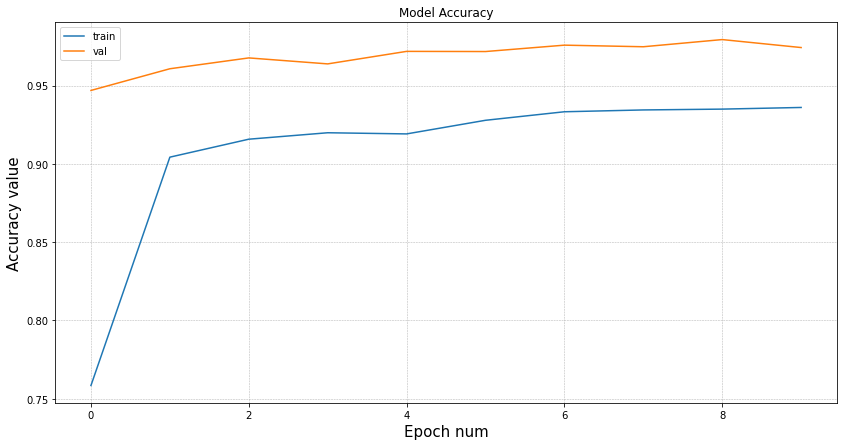

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

# Тренировка предобученной модели efficientnet_b0.

Приведенный ниже график, взятый из [статьи](https://learnopencv.com/efficientnet-theory-code/), показывает кривую производительности семейства EfficientNet.


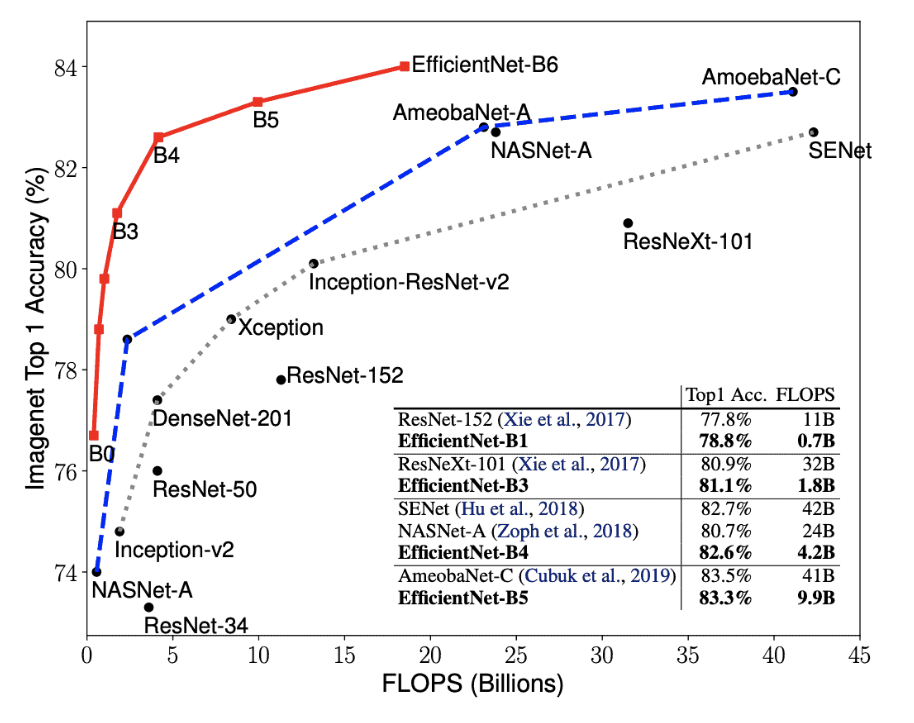

Производительность EfficientNet по сравнению с другими архитектурами CNN. 
Это показывает, что при тех же сбоях точность EfficientNet выше, чем у любой существующей архитектуры. Итак, если вы планируете использовать Inception-v2, вам следует рассмотреть возможность использования EfficientNet-B1 вместо этого. Аналогичным образом, рекомендуется рассмотреть EfficientNet-B2, если вы планируете использовать ResNet-50.

В большинстве реальных приложений люди начинают с предварительно обученной модели и настраивают ее для своего конкретного применения.

Только потому, что EfficientNet превосходит другие сети, означает ли это, что он будет превосходить другие сети в других задачах?

Хорошей новостью является то, что авторы провели эти эксперименты и показали, что при использовании магистрали EfficientNet мы также получаем лучшую производительность в других задачах компьютерного зрения.


In [ ]:
class My_Net_efficientnet_b0(torch.nn.Module):
    def __init__(self, model_name, pretrained=True, effnet=False, value=False):  
        super().__init__()
        self.model = efficientnet

        # Замораживаем веса, чтобы не использовать лишние веса в обучении, а обучать только последний слой
        for param in self.model.parameters(): # Проходим по параметрам модели (каждый параметр - это каждый слой, model.parameters нам отдаст некоторый итератор по слоям)
           param.requires_grad = False # Для каждого параметра и слоя:"requires grad = False", то есть уже не требуется вычисление градиента для данного слоя. И получается, что у нас вся сетка будет заморожена, то есть мы не сможем вообще ничего обучать            
           #fc_inputs = self.model.classifier.in_features # Добавляем полносвязанную классифицирующую голову
           self.model.classifier = nn.Sequential(
           nn.Linear(1280, 256),
           nn.ReLU(),
           nn.Linear(256, 10))


    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
model_efficientnet_b0 = My_Net_efficientnet_b0(model_name = 'efficientnet_b0', pretrained=True, effnet=True, value=False) # Формат pretrained=True - нам нужны веса, которые получились вследствие обучения этой модели на датасете ImageNet
          
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_efficientnet_b0 = model_efficientnet_b0.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска AdamW
optimizer = torch.optim.AdamW(model_efficientnet_b0.parameters(), lr=CFG.lr) 

# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

In [ ]:
print(model_efficientnet_b0)

My_Net_efficientnet_b0(
  (model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kerne

In [ ]:

summary(model=model_efficientnet_b0, 
        input_size=(8, 3, 256, 256), # входной батч
        col_names=["input_size", "output_size", "num_params"],
        col_width=20
)

Layer (type:depth-idx)                             Input Shape          Output Shape         Param #
My_Net_efficientnet_b0                             [8, 3, 256, 256]     [8, 10]              --
├─EfficientNet: 1-1                                [8, 3, 256, 256]     [8, 10]              --
│    └─Conv2d: 2-1                                 [8, 3, 256, 256]     [8, 32, 128, 128]    (864)
│    └─BatchNormAct2d: 2-2                         [8, 32, 128, 128]    [8, 32, 128, 128]    64
│    │    └─Identity: 3-1                          [8, 32, 128, 128]    [8, 32, 128, 128]    --
│    │    └─SiLU: 3-2                              [8, 32, 128, 128]    [8, 32, 128, 128]    --
│    └─Sequential: 2-3                             [8, 32, 128, 128]    [8, 320, 8, 8]       --
│    │    └─Sequential: 3-3                        [8, 32, 128, 128]    [8, 16, 128, 128]    (1,448)
│    │    └─Sequential: 3-4                        [8, 16, 128, 128]    [8, 24, 64, 64]      (16,714)
│    │    └─Sequentia

In [ ]:
model, loss, acc = train_val_model(model_efficientnet_b0, loss, optimizer, scheduler, num_epochs=CFG.epochs)

test_accuracy,▁▄▅▅▆▆▇▇█▇
test_loss,█▄▃▃▂▂▁▁▁▁
train_accuracy,▁▇▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
test_accuracy,0.97429
test_loss,0.09459
train_accuracy,0.93602
train_loss,0.21137


Epoch 1/10:


100%|██████████| 1184/1184 [00:45<00:00, 26.23it/s]


train loss: 0.71 accuracy: 0.86


100%|██████████| 491/491 [00:19<00:00, 25.54it/s]


val loss: 0.24 accuracy: 0.98
Epoch 1 - Save Best Accuracy: 0.98 Model

Epoch 2/10:


100%|██████████| 1184/1184 [00:42<00:00, 27.60it/s]


train loss: 0.30 accuracy: 0.91


100%|██████████| 491/491 [00:15<00:00, 30.84it/s]


val loss: 0.15 accuracy: 0.97
Epoch 3/10:


100%|██████████| 1184/1184 [00:43<00:00, 27.50it/s]


train loss: 0.26 accuracy: 0.92


100%|██████████| 491/491 [00:15<00:00, 31.14it/s]


val loss: 0.13 accuracy: 0.98
Epoch 3 - Save Best Accuracy: 0.98 Model

Epoch 4/10:


100%|██████████| 1184/1184 [00:44<00:00, 26.60it/s]


train loss: 0.24 accuracy: 0.93


100%|██████████| 491/491 [00:15<00:00, 32.33it/s]


val loss: 0.12 accuracy: 0.98
Epoch 5/10:


100%|██████████| 1184/1184 [00:42<00:00, 28.04it/s]


train loss: 0.23 accuracy: 0.93


100%|██████████| 491/491 [00:16<00:00, 29.25it/s]


val loss: 0.11 accuracy: 0.98
Epoch 6/10:


100%|██████████| 1184/1184 [00:41<00:00, 28.24it/s]


train loss: 0.23 accuracy: 0.93


100%|██████████| 491/491 [00:15<00:00, 32.69it/s]


val loss: 0.11 accuracy: 0.98
Epoch 7/10:


100%|██████████| 1184/1184 [00:43<00:00, 27.32it/s]


train loss: 0.20 accuracy: 0.94


100%|██████████| 491/491 [00:14<00:00, 33.11it/s]


val loss: 0.09 accuracy: 0.98
Epoch 7 - Save Best Accuracy: 0.98 Model

Epoch 8/10:


100%|██████████| 1184/1184 [00:42<00:00, 28.18it/s]


train loss: 0.20 accuracy: 0.94


100%|██████████| 491/491 [00:15<00:00, 32.40it/s]


val loss: 0.10 accuracy: 0.98
Epoch 9/10:


100%|██████████| 1184/1184 [00:43<00:00, 27.32it/s]


train loss: 0.20 accuracy: 0.94


100%|██████████| 491/491 [00:15<00:00, 32.08it/s]


val loss: 0.09 accuracy: 0.98
Epoch 9 - Save Best Accuracy: 0.98 Model

Epoch 10/10:


100%|██████████| 1184/1184 [00:41<00:00, 28.68it/s]


train loss: 0.20 accuracy: 0.94


100%|██████████| 491/491 [00:17<00:00, 27.72it/s]

val loss: 0.10 accuracy: 0.98


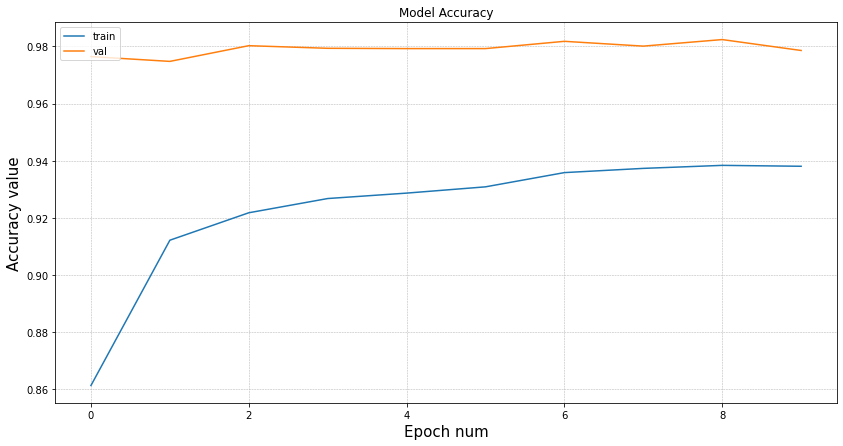

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

# Тренировка предобученной модели densenet121.

[DenseNet](https://habr.com/ru/post/498168/#DenseNet) (Densely Connected Convolutional Network) была предложена в 2017 году. Успех ResNet (Deep Residual Network) позволил предположить, что укороченное соединение в CNN позволяет обучать более глубокие и точные модели. Авторы проанализировали это наблюдение и представили компактно соединенный (dense) блок, который соединяет каждый слой с каждым другим слоем. Важно отметить, что, в отличие от ResNet, признаки («фичи») прежде чем они будут переданы в следующий слой не суммируются, а конкатенируются (объединяются, channel-wise concatenation) в единый тензор. При этом количество параметров сети DenseNet намного меньше, чем у сетей с такой же точностью работы. [Авторы утверждают](https://www.youtube.com/watch?v=-W6y8xnd--U&t=366s), что DenseNet работает особенно хорошо на малых наборах данных.



In [ ]:
class My_Net_densenet121(torch.nn.Module):
    def __init__(self, model_name, pretrained=True, effnet=False, value=False):  
        super().__init__()
        self.model = densenet
        # Замораживаем веса, чтобы не использовать лишние веса в обучении, а обучать только последний слой
        for param in self.model.parameters(): # Проходим по параметрам модели (каждый параметр - это каждый слой, model.parameters нам отдаст некоторый итератор по слоям)
           param.requires_grad = False # Для каждого параметра и слоя:"requires grad = False", то есть уже не требуется вычисление градиента для данного слоя. И получается, что у нас вся сетка будет заморожена, то есть мы не сможем вообще ничего обучать            

        fc_inputs = self.model.classifier.in_features
        self.model.classifier = nn.Linear(fc_inputs, out_features = 10)
           

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
model_densenet121 = My_Net_densenet121(model_name = 'densenet121', pretrained=True, effnet=False, value=False) # Формат pretrained=True - нам нужны веса, которые получились вследствие обучения этой модели на датасете ImageNet
          
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_densenet121 = model_densenet121.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска AdamW
optimizer = torch.optim.AdamW(model_densenet121.parameters(), lr=CFG.lr) 

# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

In [ ]:
print(model_densenet121)

My_Net_densenet121(
  (model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNormAct2d(
        64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): DenseBlock(
        (denselayer1): DenseLayer(
          (norm1): BatchNormAct2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): ReLU(inplace=True)
          )
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNormAct2d(
            128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): ReLU(inplace=True)
          )
          (conv2): Conv2d(128, 32

In [ ]:
summary(model=model_densenet121, 
        input_size=(8, 3, 256, 256), # входной батч
        col_names=["input_size", "output_size", "num_params"],
        col_width=20
)

Layer (type:depth-idx)                             Input Shape          Output Shape         Param #
My_Net_densenet121                                 [8, 3, 256, 256]     [8, 10]              --
├─DenseNet: 1-1                                    [8, 3, 256, 256]     [8, 10]              --
│    └─Sequential: 2-1                             [8, 3, 256, 256]     [8, 1024, 8, 8]      --
│    │    └─Conv2d: 3-1                            [8, 3, 256, 256]     [8, 64, 128, 128]    (9,408)
│    │    └─BatchNormAct2d: 3-2                    [8, 64, 128, 128]    [8, 64, 128, 128]    (128)
│    │    └─MaxPool2d: 3-3                         [8, 64, 128, 128]    [8, 64, 64, 64]      --
│    │    └─DenseBlock: 3-4                        [8, 64, 64, 64]      [8, 256, 64, 64]     (335,040)
│    │    └─DenseTransition: 3-5                   [8, 256, 64, 64]     [8, 128, 32, 32]     (33,280)
│    │    └─DenseBlock: 3-6                        [8, 128, 32, 32]     [8, 512, 32, 32]     (919,680)
│    │ 

In [ ]:
model, loss, acc = train_val_model(model_densenet121, loss, optimizer, scheduler, num_epochs=CFG.epochs)

test_accuracy,▃▁▆▅▅▅▇▆█▅
test_loss,█▄▃▃▂▂▁▁▁▂
train_accuracy,▁▆▆▇▇▇████
train_loss,█▂▂▂▂▁▁▁▁▁
test_accuracy,0.97856
test_loss,0.0986
train_accuracy,0.93803
train_loss,0.19597


Epoch 1/10:


100%|██████████| 1184/1184 [01:00<00:00, 19.71it/s]


train loss: 1.08 accuracy: 0.76


100%|██████████| 491/491 [00:23<00:00, 21.23it/s]


val loss: 0.42 accuracy: 0.92
Epoch 1 - Save Best Accuracy: 0.92 Model

Epoch 2/10:


100%|██████████| 1184/1184 [00:59<00:00, 19.80it/s]


train loss: 0.50 accuracy: 0.88


100%|██████████| 491/491 [00:22<00:00, 22.11it/s]


val loss: 0.25 accuracy: 0.95
Epoch 2 - Save Best Accuracy: 0.95 Model

Epoch 3/10:


100%|██████████| 1184/1184 [01:00<00:00, 19.42it/s]


train loss: 0.39 accuracy: 0.90


100%|██████████| 491/491 [00:22<00:00, 21.35it/s]


val loss: 0.20 accuracy: 0.95
Epoch 3 - Save Best Accuracy: 0.95 Model

Epoch 4/10:


100%|██████████| 1184/1184 [01:01<00:00, 19.30it/s]


train loss: 0.34 accuracy: 0.90


100%|██████████| 491/491 [00:21<00:00, 22.55it/s]


val loss: 0.18 accuracy: 0.95
Epoch 4 - Save Best Accuracy: 0.95 Model

Epoch 5/10:


100%|██████████| 1184/1184 [01:01<00:00, 19.40it/s]


train loss: 0.32 accuracy: 0.91


100%|██████████| 491/491 [00:21<00:00, 22.47it/s]


val loss: 0.14 accuracy: 0.96
Epoch 5 - Save Best Accuracy: 0.96 Model

Epoch 6/10:


100%|██████████| 1184/1184 [01:01<00:00, 19.21it/s]


train loss: 0.29 accuracy: 0.92


100%|██████████| 491/491 [00:21<00:00, 22.66it/s]


val loss: 0.13 accuracy: 0.96
Epoch 6 - Save Best Accuracy: 0.96 Model

Epoch 7/10:


100%|██████████| 1184/1184 [01:02<00:00, 19.07it/s]


train loss: 0.27 accuracy: 0.92


100%|██████████| 491/491 [00:21<00:00, 23.35it/s]


val loss: 0.12 accuracy: 0.97
Epoch 7 - Save Best Accuracy: 0.97 Model

Epoch 8/10:


100%|██████████| 1184/1184 [01:00<00:00, 19.56it/s]


train loss: 0.25 accuracy: 0.93


100%|██████████| 491/491 [00:23<00:00, 21.30it/s]


val loss: 0.11 accuracy: 0.97
Epoch 9/10:


100%|██████████| 1184/1184 [01:00<00:00, 19.68it/s]


train loss: 0.26 accuracy: 0.92


100%|██████████| 491/491 [00:22<00:00, 22.29it/s]


val loss: 0.11 accuracy: 0.97
Epoch 9 - Save Best Accuracy: 0.97 Model

Epoch 10/10:


100%|██████████| 1184/1184 [01:01<00:00, 19.22it/s]


train loss: 0.24 accuracy: 0.93


100%|██████████| 491/491 [00:21<00:00, 22.55it/s]

val loss: 0.11 accuracy: 0.96


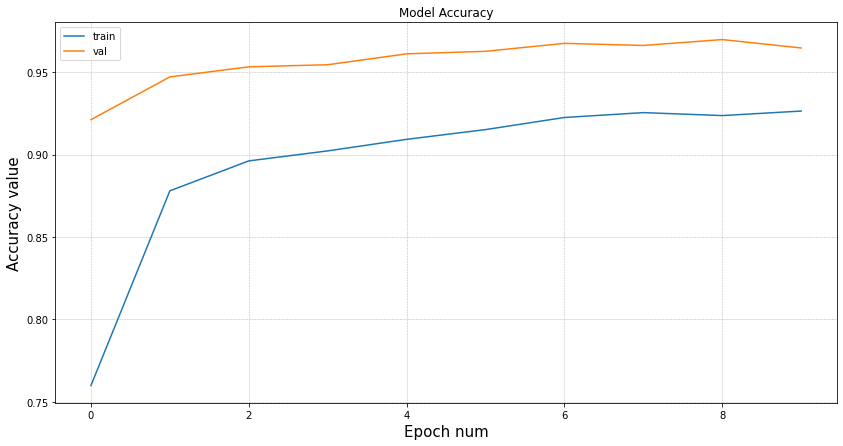

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

# Выводы.

1. Модель ResNet.

Содержит следующие параметры:
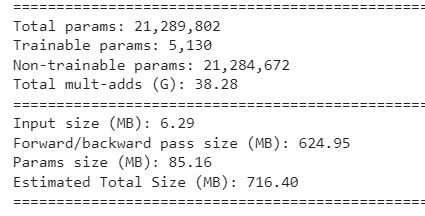


И показывает следующие результаты на тесте:

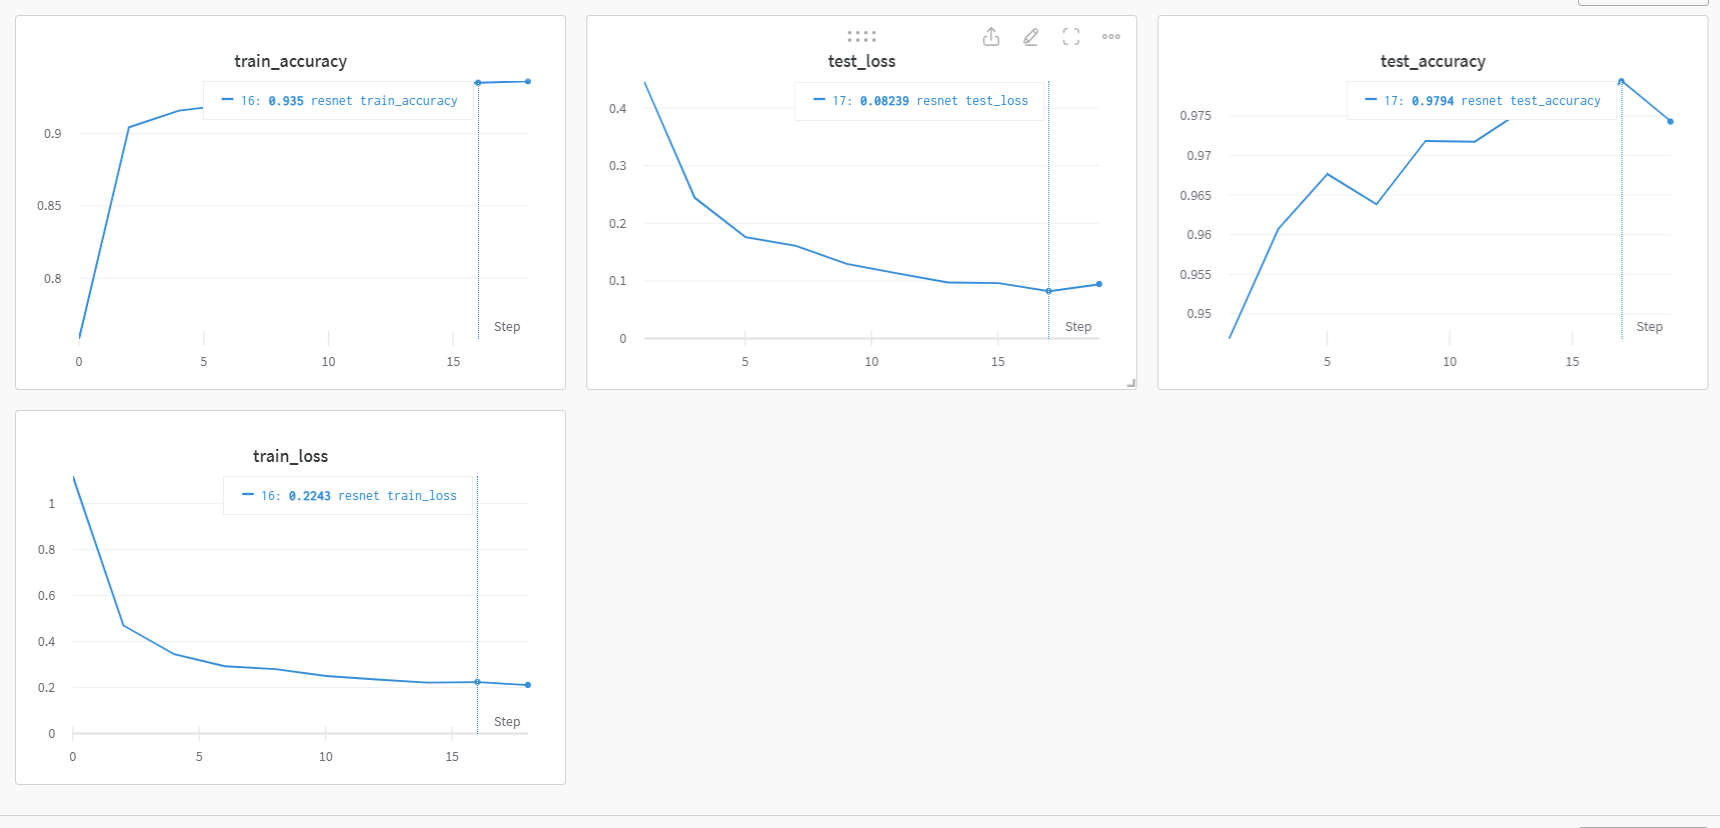


И видно, что после 9-й эпохи уже начинается переобучение, так как начинает расти ошибка на тестовых данных.

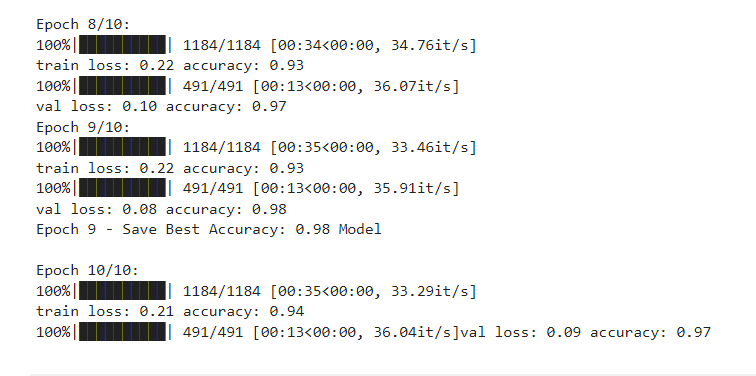

2. Модель EfficientNet.

Содержит следующие параметры:

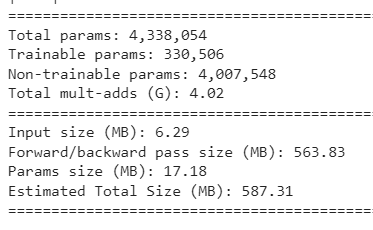


И показывает следующие результаты на тесте:

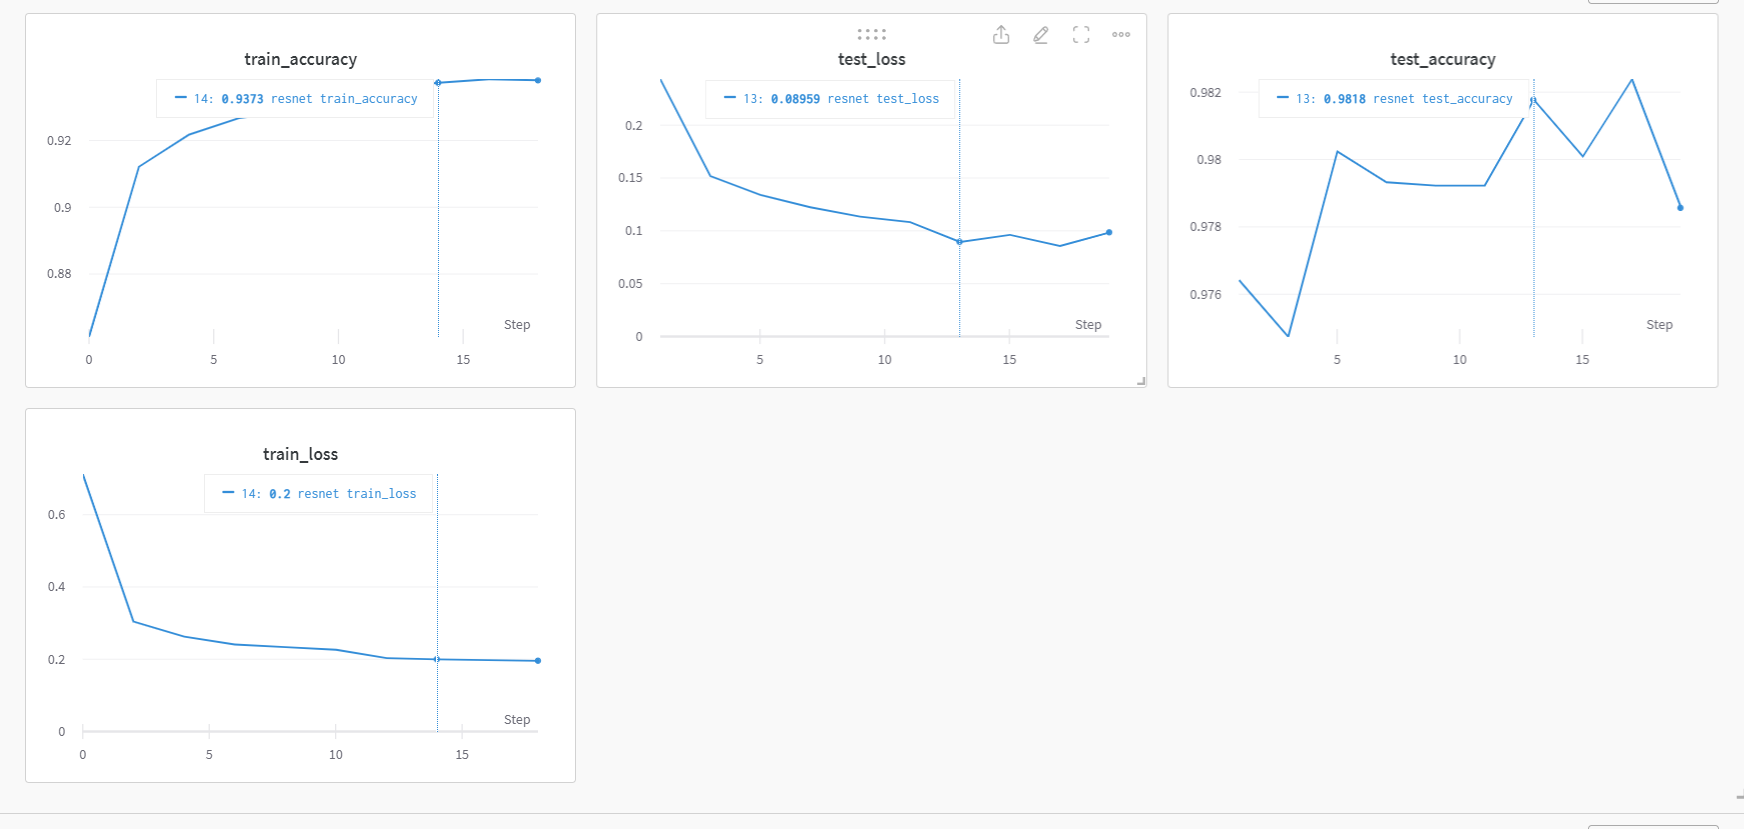

И видно, что после 7-й эпохи уже начинается переобучение, так как начинает расти ошибка на тестовых данных.

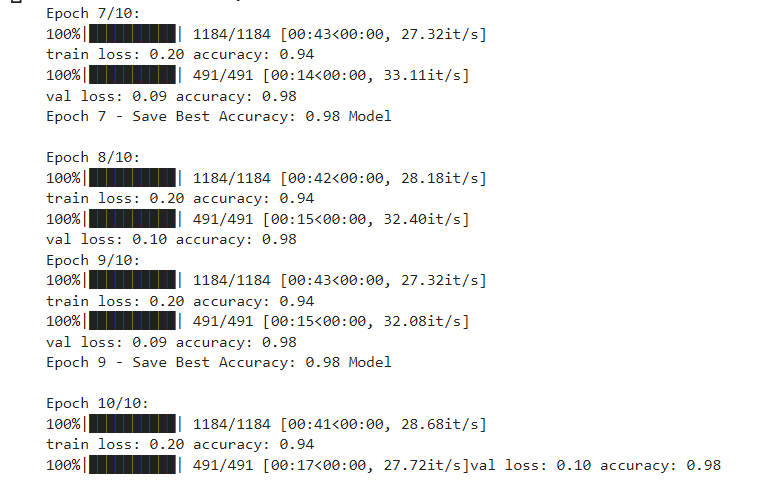

3. Модель DenseNet.

Содержит следующие параметры:

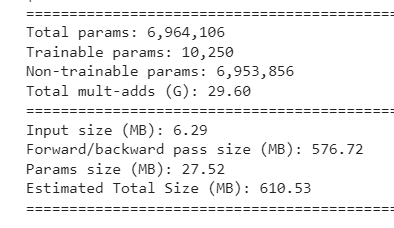

Показывает следующие результаты на тесте:

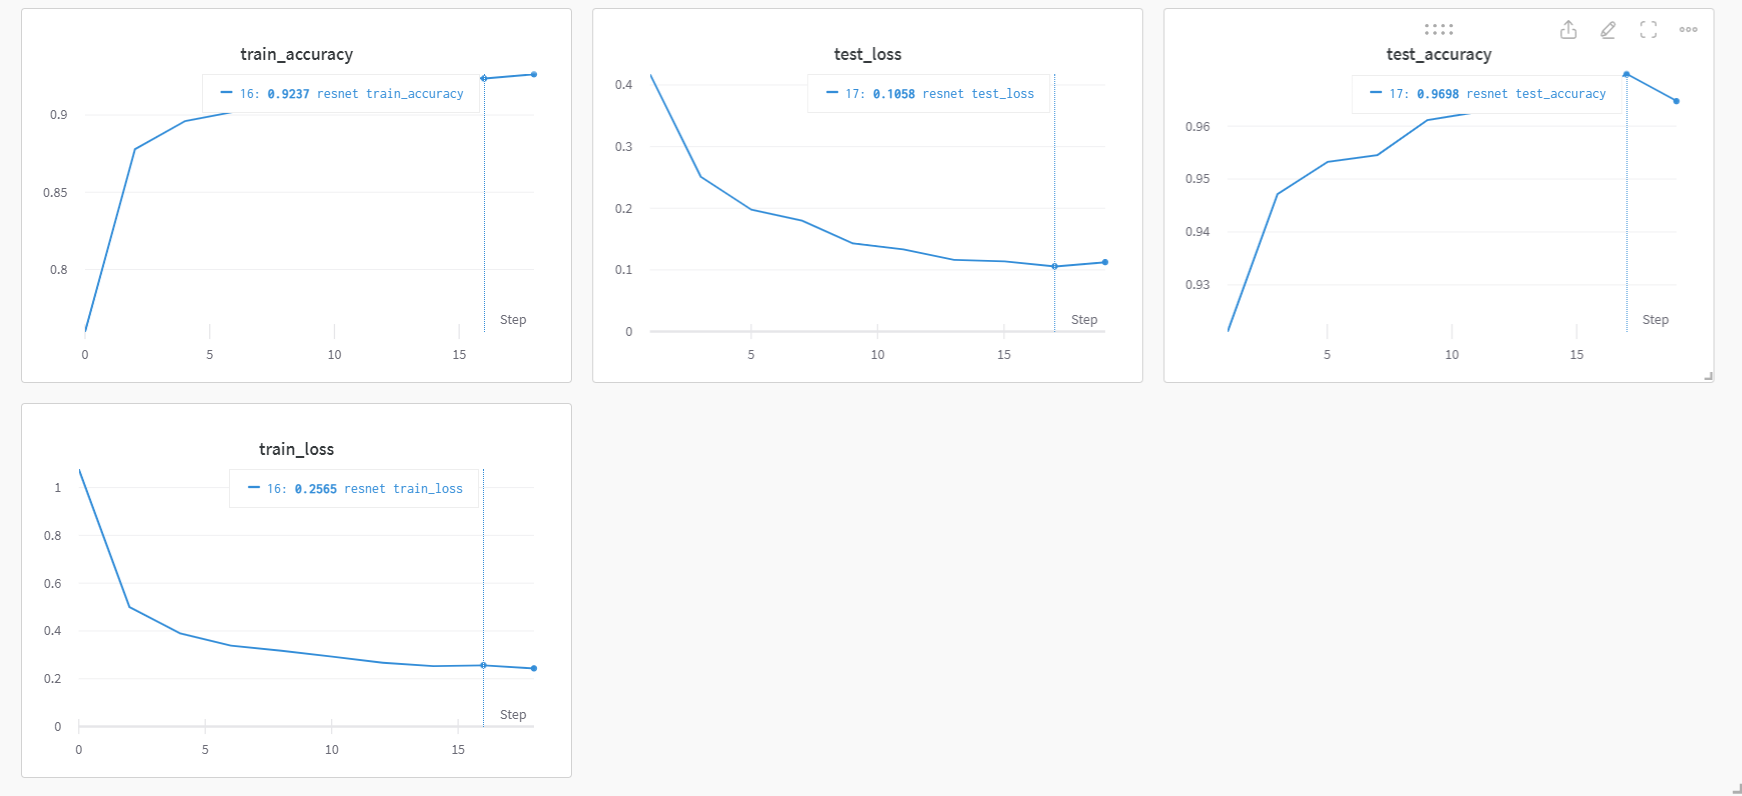


И видно, что после 8-й эпохи уже начинается переобучение, так как начинает расти ошибка на тестовых данных.

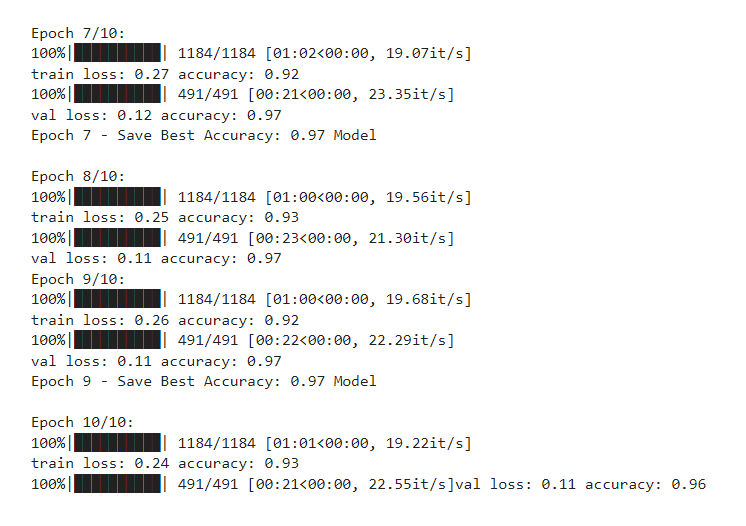

Общие выводы по разделу.

На мой взгляд, лучше всего себя показала модель ResNet34. Так как она единственная достигла точности в 98%, она быстрее всех дообучилась (по 35 секунд на эпоху с использованием ускорителя и по 35 минут на эпоху без ускорителей), у этой модели меньше всего тренируемых параметров (5130 против 330506 и 10250 у других использованных моделей).

Дольше всех обучалась DeseNet121 - по минуте на эпоху с ускорителем и по часу без ускорителей.

При проведении предварительных тестов было выявлено, что 10 эпох достаточно всем моделям, дальше начинается переобучение.

В целом, все модели показали высокие результаты.